# <font color='black'> HomeWork-4
Netid: sbhamid2</font>

__Your goal is to implement the REINFORCE algorithm (Sutton & Barto, Section 13.3) and to use it to train an agent for the grid_world environment.__

__Implement REINFORCE so that it can be used on arbitrary discrete-state/discrete-action gym environments. Follow the same pattern that you used with SARSA and Q-Learning on HW2, including the use of an episode_length parameter. Assume that reward is not discounted. Please use a tabular policy that can be described (for example) by a matrix with number_of_states rows and number_of_actions columns, where the element in row a and column s is the weight of taking action a in state s. Please compute the probability of taking action a in state s by softmax. Note that, to implement REINFORCE, you will have to derive an expression for the gradient of the log-probability with respect to the weights. Apply your new algorithm to your grid_world example from HW1. Choose hyperparameters so that the training converges. Test your algorithm on both the "easy" version of grid_world (actions deterministically move the agent) and the "hard" version (some probability of moving in a direction different to the desired action). Compare the learning speed (number of episodes) to SARSA and Q-Learning. Does REINFORCE converge faster or slower in this particular case? How do different hyperparameters influence the convergence?__

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gridworld.gridworld import GridWorldEnvNew
import qlearning as ql
import SARSAlearning as sa
import reinforce as re

myenv = gym.make('MyGridworld-v2')
set_params = {}
myenv.seed(543)

[543]

In [2]:
##### Results are shown for easy version, can be changed to hard version as well here
myenv.env.version = 'easy' #'hard'

In [3]:
## Plotting the learning curves of REINFORCE learning
set_params.update({'no_eps': 1000, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50})
agentA = re.REINFORCElearning(myenv)
pfuncA, rewardA = agentA.train(set_params)

Version:  easy


In [4]:
## Plotting the learning curves of REINFORCE learning : Changing batch size
set_params.update({'no_eps': 1000, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 20})
agentB = re.REINFORCElearning(myenv)
pfuncB, rewardB = agentB.train(set_params)

Version:  easy


In [5]:
## Plotting the learning curves of REINFORCE learning : Changing episode length
set_params.update({'no_eps': 1000, 'eps_len': 150, 'alpha': 0.05, 'batch_size': 50})
agentC = re.REINFORCElearning(myenv)
pfuncC, rewardC = agentC.train(set_params)

Version:  easy


In [6]:
## Plotting the learning curves of REINFORCE learning : Changing learning rate
set_params.update({'no_eps': 1000, 'eps_len': 100, 'alpha': 0.01, 'batch_size': 50})
agentD = re.REINFORCElearning(myenv)
pfuncD, rewardD = agentD.train(set_params)

Version:  easy


__Results showing the influence of hyperparameter choice on these learning curves__ 

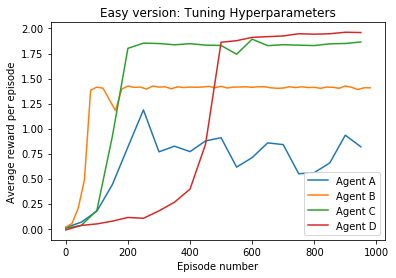

In [7]:
plt.plot(np.arange(int(agentA.no_eps/float(agentA.batch_size)))*agentA.batch_size, rewardA, label='Agent A')
plt.plot(np.arange(int(agentB.no_eps/float(agentB.batch_size)))*agentB.batch_size, rewardB, label='Agent B')
plt.plot(np.arange(int(agentC.no_eps/float(agentC.batch_size)))*agentC.batch_size, rewardC, label='Agent C')
plt.plot(np.arange(int(agentD.no_eps/float(agentD.batch_size)))*agentD.batch_size, rewardD, label='Agent D')
plt.legend()
plt.ylabel('Average reward per episode')
plt.xlabel('Episode number')
plt.title('Easy version: Tuning Hyperparameters')
plt.show()

__Learning curves (a plot of total reward versus episode) for REINFORCE, SARSA, and Q-Learning__    

In [8]:
## Plotting the learning curves of Qlearning
ql_agent_easy = ql.Qlearning(myenv)
set_params.update({'no_eps': 300, 'eps_len': 150, 'alpha': 0.05, 'gamma': 0.9, 'epsilon': 0.9, 'decay': 0.98})
ql_qfunc_easy, ql_reward_easy = ql_agent_easy.train(set_params)

Version:  easy


In [9]:
## Plotting the learning curves of SARSA
sarsa_agent_easy = sa.SARSAlearning(myenv)
set_params.update({'no_eps': 300, 'eps_len': 150, 'alpha': 0.05, 'gamma': 0.9, 'epsilon': 0.9, 'decay': 0.98})
sarsa_qfunc_easy, sarsa_reward_easy = sarsa_agent_easy.train(set_params)

Version:  easy


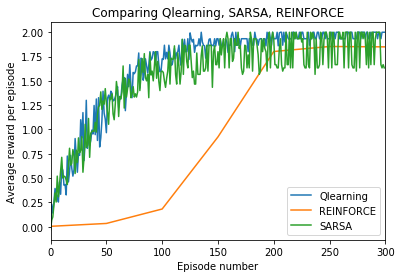

In [23]:
plt.plot(np.arange(ql_agent_easy.no_eps), ql_reward_easy, label='Qlearning')
plt.plot(np.arange(int(agentC.no_eps/float(agentC.batch_size)))*agentC.batch_size, rewardC, label='REINFORCE')
plt.plot(np.arange(sarsa_agent_easy.no_eps), sarsa_reward_easy, label='SARSA')
plt.legend()
plt.ylabel('Average reward per episode')
plt.xlabel('Episode number')
plt.title('Comparing Qlearning, SARSA, REINFORCE')
plt.xlim([0,300])
plt.show()

__Example trajectories for your trained agents__

Reset state:  [3, 2]


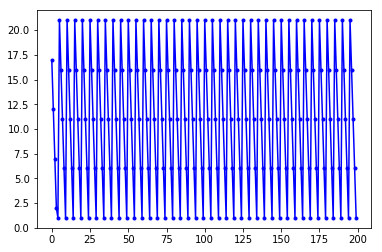

In [18]:
### Q learning: example trajectory of robot using trained policy via Q learning
eps_len = 200
record_pos, record_action = agentC.test(eps_len)
plt.plot(np.arange(eps_len), record_pos, 'b')
plt.plot(np.arange(eps_len), record_pos, 'b.')
plt.show()

__Derivation of gradient of log-probability for tabular policy__

$\Delta_{\theta}J(\theta) = \dfrac{1}{N}\sum_{i=1}^N\Bigg(\sum_{t=1}^T \Delta_{\theta}log p(a^i_{t}|s^i_t,\theta) \Bigg) \Bigg(\sum_{t=1}^T r(s^i_t,a^i_t)\Bigg)$ \\

$p(a^i_{t}|s^i_t,\theta) = \dfrac{e^{\theta_{as}}}{\sum_{a'=1}^{n_a}e^{\theta_{a's}}}$ \\

$log p(a^i_{t}|s^i_t,\theta) = \theta_{as}-log\Big(\sum_{a'=1}^{n_a}e^{\theta_{a's}} \Big)$ \\

$ \dfrac{\partial}{\partial \theta_{\bar{a} \bar{s}} }log p(a^i_{t}|s^i_t,\theta) = \delta_{s\bar{s}} \Bigg(\delta_{\bar{a}a}-p(\bar{a}|s_{i},\theta) \Bigg)$ 

Also, gradient for given state and action is 1- probability whereas for other actions, given states gradient is negative probability